In [86]:
# needed for GridSearch
import warnings
warnings.filterwarnings('ignore')
import timeit

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

path = Path('data', 'weatherAUS_clean.csv')
df = pd.read_csv(path)

In [87]:
# split into train and test
label = df.pop('RainTomorrow_Yes')
train_X, test_X, train_y, test_y = train_test_split(df, label, test_size= 0.3)

In [88]:
# Logistic Regression

# different values for most important hyper-parameters
parameter_space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', '11', '12', 'elasticnet'],
    'C': [0.001, 1, 1000],
}

clf = LogisticRegression()
clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
start = timeit.default_timer()
clf.fit(train_X, train_y)
stop = timeit.default_timer()

print('Runtime: %0.0f seconds' % (stop - start))
print('Best parameters found: ', clf.best_params_)
print('Mean-CV accuracy: %0.3f' % clf.best_score_)

predicitons = clf.predict(test_X)
print(metrics.classification_report(test_y, predicitons, digits=3))


Runtime: 168 seconds
Best parameters found:  {'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
Mean-CV accuracy: 0.852
              precision    recall  f1-score   support

           0      0.875     0.947     0.909     28663
           1      0.745     0.536     0.624      8348

    accuracy                          0.854     37011
   macro avg      0.810     0.742     0.767     37011
weighted avg      0.846     0.854     0.845     37011



In [89]:
# Decision Tree

parameter_space = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': ['None', 5, 10, 20],
    'min_samples_split': [2, 3, 4],
    'max_leaf_nodes': ['None', 30, 50, 100],
}

clf = DecisionTreeClassifier()
clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
start = timeit.default_timer()
clf.fit(train_X, train_y)
stop = timeit.default_timer()

print('Runtime: %0.0f seconds' % (stop - start))
print('Best parameters found: ', clf.best_params_)
print('Mean-CV accuracy: %0.3f' % clf.best_score_)

predicitons = clf.predict(test_X)
print(metrics.classification_report(test_y, predicitons, digits=3))

Runtime: 142 seconds
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 100, 'min_samples_split': 2, 'splitter': 'best'}
Mean-CV accuracy: 0.842
              precision    recall  f1-score   support

           0      0.864     0.944     0.902     28663
           1      0.717     0.490     0.582      8348

    accuracy                          0.841     37011
   macro avg      0.791     0.717     0.742     37011
weighted avg      0.831     0.841     0.830     37011



[Text(0.5, 0.875, 'X[18] <= 0.736\nentropy = 0.767\nsamples = 86358\nvalue = [67014, 19344]'),
 Text(0.25, 0.625, 'X[7] <= -0.021\nentropy = 0.549\nsamples = 66290\nvalue = [57877, 8413]'),
 Text(0.125, 0.375, 'X[20] <= -0.116\nentropy = 0.844\nsamples = 12778\nvalue = [9308, 3470]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[18] <= -0.006\nentropy = 0.444\nsamples = 53512\nvalue = [48569, 4943]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[18] <= 1.46\nentropy = 0.994\nsamples = 20068\nvalue = [9137, 10931]'),
 Text(0.625, 0.375, 'X[10] <= 0.119\nentropy = 0.978\nsamples = 13382\nvalue = [7848, 5534]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[18] <= 1.701\nentropy = 0.707\nsamples = 6686\nvalue = [1289, 5397]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

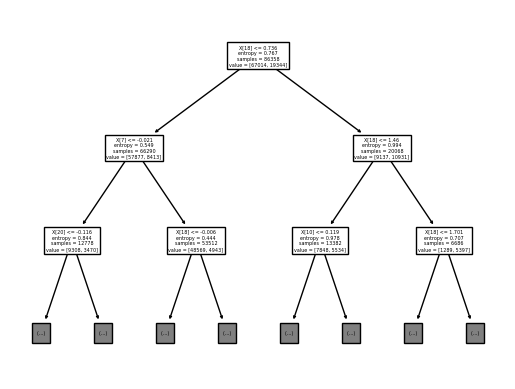

In [90]:
tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, max_leaf_nodes= 100, min_samples_split=2)
tree.fit(train_X, train_y)
#plt.figure(figsize=(50,50))
plot_tree(tree, max_depth=2)


In [91]:
# Bagged Tree

parameter_space = {
    'n_estimators' : [10, 50, 100, 200],
    'max_features' : [1, 0.5, 1.0, 10.0, 10],
}

clf = BaggingClassifier()
clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
start = timeit.default_timer()
clf.fit(train_X, train_y)
stop = timeit.default_timer()

print('Runtime: %0.0f seconds' % (stop - start))
print('Best parameters found: ', clf.best_params_)
print('Mean-CV accuracy: %0.3f' % clf.best_score_)

predicitons = clf.predict(test_X)
print(metrics.classification_report(test_y, predicitons, digits=3))

Runtime: 914 seconds
Best parameters found:  {'max_features': 1.0, 'n_estimators': 100}
Mean-CV accuracy: 0.860
              precision    recall  f1-score   support

           0      0.878     0.954     0.914     28663
           1      0.774     0.545     0.640      8348

    accuracy                          0.862     37011
   macro avg      0.826     0.749     0.777     37011
weighted avg      0.855     0.862     0.852     37011



In [92]:
# Random Forest

parameter_space = {
    'n_estimators' : [10, 50, 100, 200],
    'max_features' : ['sqrt', 'log2', None],
}

clf = RandomForestClassifier()
clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
start = timeit.default_timer()
clf.fit(train_X, train_y)
stop = timeit.default_timer()

print('Runtime: %0.0f seconds' % (stop - start))
print('Best parameters found: ', clf.best_params_)
print('Mean-CV accuracy: %0.3f' % clf.best_score_)

predicitons = clf.predict(test_X)
print(metrics.classification_report(test_y, predicitons, digits=3))

Runtime: 596 seconds
Best parameters found:  {'max_features': 'sqrt', 'n_estimators': 200}
Mean-CV accuracy: 0.860
              precision    recall  f1-score   support

           0      0.875     0.960     0.916     28663
           1      0.795     0.528     0.635      8348

    accuracy                          0.863     37011
   macro avg      0.835     0.744     0.775     37011
weighted avg      0.857     0.863     0.852     37011

